In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np


def load_fashion_mnist(image_file, label_file):
    with open(image_file, 'rb') as f:
        images = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28, 1)
    with open(label_file, 'rb') as f:
        labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
    return images, labels


train_images, train_labels = load_fashion_mnist('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')
test_images, test_labels = load_fashion_mnist('t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte')


train_images = train_images / 255.0
test_images = test_images / 255.0

input_shape = (28, 28, 1)


batch_size = 64

def alexnet(input_shape, num_classes):
    model = models.Sequential()
  
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))  

    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


num_classes = 10 
model = alexnet(input_shape, num_classes)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=batch_size, validation_data=(test_images, test_labels))


Epoch 1/10
938/938 [==============================] - 23s 14ms/step - loss: 0.5906 - accuracy: 0.7882 - val_loss: 0.5756 - val_accuracy: 0.7947
Epoch 2/10
938/938 [==============================] - 13s 13ms/step - loss: 0.4331 - accuracy: 0.8457 - val_loss: 0.4976 - val_accuracy: 0.8338
Epoch 3/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3909 - accuracy: 0.8597 - val_loss: 0.4190 - val_accuracy: 0.8456
Epoch 4/10
938/938 [==============================] - 13s 13ms/step - loss: 0.3602 - accuracy: 0.8703 - val_loss: 0.3975 - val_accuracy: 0.8601
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3386 - accuracy: 0.8788 - val_loss: 0.5160 - val_accuracy: 0.8472
Epoch 6/10
938/938 [==============================] - 13s 13ms/step - loss: 0.3237 - accuracy: 0.8838 - val_loss: 0.4489 - val_accuracy: 0.8404
Epoch 7/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3074 - accuracy: 0.8881 - val_loss: 0.4052 - val_accuracy:

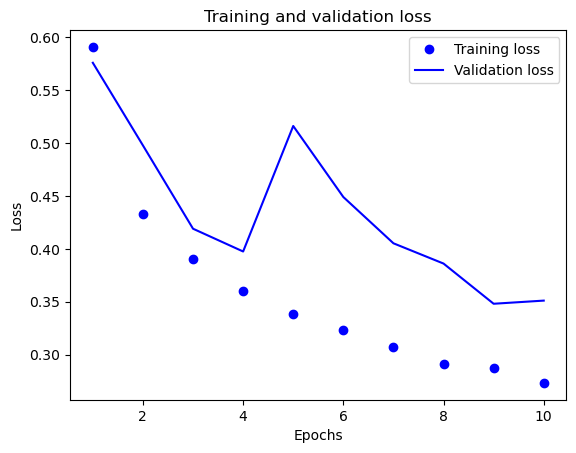

In [2]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot loss vs epochs
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

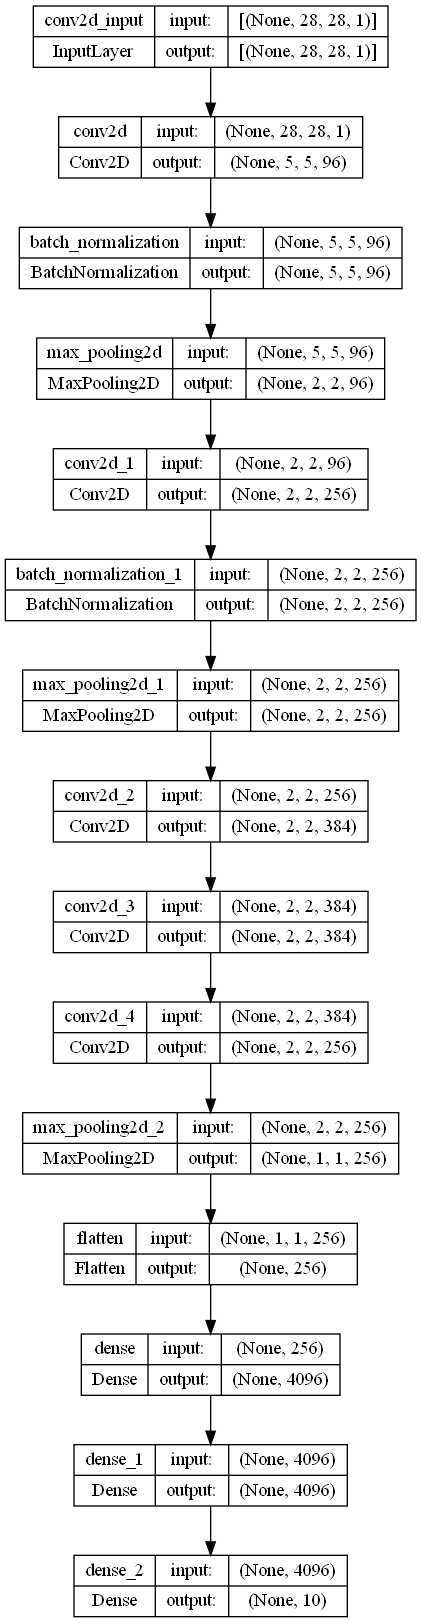

In [3]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)